# Assignment 1: SVM

## Background

One of the crucial problems we have been trying to solve is to grant computers the ability to “see” and “understand” images. This falls under the domain of Computer Vision in Deep Learning. Now, we as human beings are able to recognize almost all the objects around us in our day to day lives and it happens mostly because we have seen these items before – however, to teach computers  this ability a large database of over 14 million image samples was created to train the computer to determine if

![UpwardCat](https://i.chzbgr.com/full/9064711424/hF0FE1AAD/downward-dog-meet-upward-cat)

the above image represents a cat. We are now going to look into one of the first attempts of making the machine learn the image provided to them.


## MNIST Data

Modified National Institute of Standards and Technology database or MNIST is a large database of handwritten digits of numerals from 0 to 9 which are used to train a machine to identify the different digits. This first attempt was made as a means to expedite the processing of postal letters sorting in the United States Postal Service (USPS) by automating the identification of pin codes. It is one of the earliest attempts we have made at making machines learn from images of handwritten digits. Today, you are going to use this dataset to train a machine learning model (Support Vector Machine) to identify the digits. 
MNIST dataset contains 70,000 images – 60,000 of which is for training purpose and 10,000 for testing purposes. The dataset is not perfectly equally distributed which means, you will not find exactly 7000 samples of each digit. There can be 6700 samples of one and 7200 samples of the other. It is also part of the reason we will be performing the subsample of our dataset. 

![MNIST data](https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png) 



## Assignment 


In this problem, we will train a support vector machine (SVM) to predict handwritten digits from the MNIST dataset.

An SVM solves an optimization problem for maximizing the margin between two classes. 

Suppose that we have a binary classification problem where $(x_{i},y_{i})$ are the data and ground-truth labels respectively and $y_{i} ∈ \{−1, 1\}$ (means the labels $y_{i}$ can have is either -1 or 1). We would like to find a hyper-plane (a plane in higher dimensions) that separates the data such that
all examples with labels $y_{i} = +1$ are on side and all examples with labels $y_{i} = −1$ are on the other
side. You can eliminate the offset parameter by
appending a 1 to the data, i.e., feeding in $x′ = [x, 1]$ as the data with the same labels.We will train an SVM using the “scikit-learn” library. The image below shows a very simple description of how SVM performs linear seperation using the support vectors. It corresponds to Figure 3.1 in the Deep Learning Course Notes.

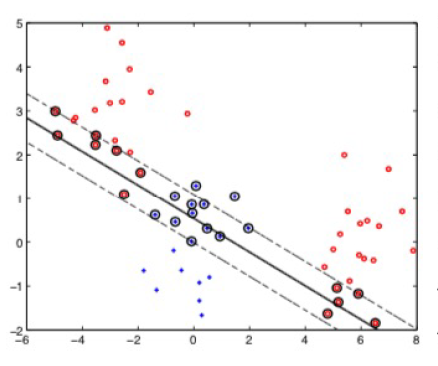



## Instructions

Complete the starter code methods provided without changing their signatures or number of return values. 

### Note:
You are expected to write code where you see **your code here**.  
Make sure you delete the lines with **raise NotImplementedError** or your code may not run correctly.

## Import Libraries

The code cell below contains all the python packages you will need to complete this assignment. Do not update
the python package or add new ones. Doing so will may cause the autograder to fail.

In [1]:
#Basic libraries for functionalities
import numpy as np              #numpy library stands for numerical python - they create a datatype called arrays which speeds up calculation
import matplotlib.pyplot as plt #matplotlib is a library used for drawing graphs and plotting
import cv2                      #cv2 library is for computer vision application - mostly used for working with images
import random                   #used to create random datasets
import pandas as pd             #used to read data

# Machine learning elements downloaded over here
from sklearn.metrics import confusion_matrix #sklearn stands for scinetific kit learn - It contains a bunch of ML functions and useful functions to work with
from sklearn import svm                      #svm is the support vector machine - our model that we want to implement
from sklearn.model_selection import train_test_split, GridSearchCV # train test split is used to split our data into training and testing set and grid search will be used for hyperparameter optimization later on

# mock testing
from unittest.mock import Mock, patch, ANY



## Load Data

The first step is to load the data into a format that we can use. 

The data has been downloaded and is in the same directory as this notebook.  We can use numpy to read in the csv files into an numpy array. 

The features and labels are in the files mnist_features.csv and mnist_labels.csv respectively


We will use the numpy method 'loadtxt' to import the label data into the variable 'labels'. The arguments we are using are:
* `labels_csv`: file path = mnist_labels.csv
* `delimiter`: comma since we are reading a csv
* `dtype`: we want the datatype of the resulting array to be integer
* `skiprows`: set to 0 since there is no header row

Run the code below to import the label data into a numpy array. 

In [2]:
# Load label data into a numpy array
labels_csv = 'mnist_labels.csv'
labels = np.loadtxt(labels_csv, delimiter=',', dtype=int, skiprows=0)

In [3]:
labels

array([5, 0, 4, ..., 4, 5, 6])

Run the cell below to print out information regarding the label data.  Feel free to add additional print statements to help understand the data.

In [4]:
'''
Print:
 - the shape of the labels array: One dimensional array with 70,000 elements (60,000 training and 10,000 testing)
 - the first element in the array: 5
 - the type of an array element: numpy.int64 : The data is stored as numpy array (helps in speeding up calculation), where int64 represents it is integer datatype occupying 64 bits of memory 
'''

print(f"Labels shape: {labels.shape}")
print(f"Value of the first label: {labels[0]}")
print(f"Data type of the label element: {type(labels[0])}")

Labels shape: (70000,)
Value of the first label: 5
Data type of the label element: <class 'numpy.int64'>


We will now use the numpy method 'loadtxt' to import the feature data into the variable features. The arguments we are using are:
* `features_csv`: file path = mnist_features.csv
* `delimiter`: comma since we are reading a csv
* `dtype`: we want the datatype of the resulting array to be float 
* `skiprows`: set to 0 since there is no header row

Run the code below to import the feature data into a numpy array. 

In [5]:
# Load feature data into a numpy array
features_csv = 'mnist_features.csv'
features = np.loadtxt(features_csv, delimiter=',', dtype=float, skiprows=0)

Run the cell below to print out information regarding the feature data.  Feel free to add additional print statements to help understand the data.

In [6]:
'''
Print:
 - the shape of the features array: Two dimension array (70000, 784) : The first element - 70,000 is the total number of images and the second element is the size of each image - which is 784 pixels  
 - we print out what values are in the 784 pixesl of the first feature(image) 
 - the datatype of the first array element: numpy.ndarray
 
 - the value of the first element in the first feature array: 0.0
 - the type of the first element in the first feature array: numpy.float64
'''

print(f"Features shape: {features.shape}")
print(f"Value of the first feature: {features[0]}")
print(f"Data type of the feature element: {type(features[0])}")
print()
print(f"Value of the first element in the first feature array: {features[0][0]}")
print(f"Data type of the first element in the first feature array: {type(features[0][0])}")

Features shape: (70000, 784)
Value of the first feature: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253.

## View Sample Image

After loading the data, it is useful to look at a sample image.  
Run the commands below to see the data shape and the first image. 
You should see an image of the number 5, which we earlier learnt is the first image in the  feature array.  

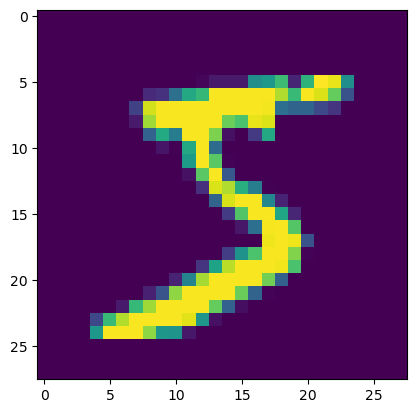

In [7]:
'''
The code below will take the first element from the feature variable having a size of 784 pixels
and convert it to a 28 x 28 using reshape method two dimensional array for matplotlib to display.
'''

plt.imshow(features[0].reshape((28, 28)))

## Subsampling
 
There are currently 70,000 images in our data set.  To make the model training time shorter, we need to reduce the number of samples.

Implement the method `subsample` below to reduce the number of samples to 10,000.  Made sure all 10 label possibilities are equally represented (1000 images per label).

Your method must take in the feature set (2 dimensional numpy array which contains images and is of the size (70,000, 784)) and the label set (1 dimensional numpy array which contains the labels and is of the size (70,000)). 

### Do not change the method name, signature, or return values.

In [8]:
def subsample(x, y):
    '''
    x: Feature set, as a 2 dimensional numpy array
    y: Labels, as a 1 dimensional numpy array
    
    Return: x_small, y_small subsampled MNIST dataset containing 1,000 images of each digit
    '''

### Uncomment each line of code and complete as needed

    
    idx = []                                        # A blank array to hold the list of indices of subsampled. Fill in idx with a list of label indicies (1000 per label)
    for i in range(10):                             # A for loop that goes through all the different classes of data from 0 to 9 
        idx.extend(np.where(y == i)[0][:1000])     # here we check for each class by np.where and extract the first 1000 values of their class
    random.shuffle(idx)                             # Shuffle the index array so that the data points are not in order
    x_small = x[idx]                                # Create the subsampled feature array
    y_small = y[idx]                                # create the subsampled label array
    return x_small, y_small                         # return the subsampled feature and the subsampled array

Subsample the data set by calling your subsample method.  

Put the features in the variable `features_subsampled` and the labels in `labels_subsampled`


Print the shape of both your feature and label arrays to verify they are as expected. 

In [9]:
"""
Call your subsample method

Input:
 - features
 - labels
 - total number of subsamples
 
Output:
 - features_subsampled
 - lables_subsampled
 
Print:
 - shape of features_subsampled
 - shape of lables_subsampled
"""


# Uncomment each line of code and complete as needed 
features_subsampled, labels_subsampled = subsample(features, labels) # Call the subsample function with the parameters
print(f'Subsampled feature shape: {features_subsampled.shape}') #Mention the name of the variable whose variable we are going to print out over here 
print(f'Subsampled labels shape:  {labels_subsampled.shape}') #Mention the name of the variable whose variable we are going to print out over here 
      

Subsampled feature shape: (10000, 784)
Subsampled labels shape:  (10000,)


In [10]:
###############################
##### TEST YOUR CODE HERE #####
###############################

# Check that the subsampled arrays are the correct size

features_subsampled_shape_expected = (10000, 784)
labels_subsampled_shape_expected = (10000,)

features_subsampled_shape_actual = features_subsampled.shape
labels_subsampled_shape_actual = labels_subsampled.shape

assert features_subsampled_shape_actual == features_subsampled_shape_expected, \
    f"Incorrect.  Feature shape after subsampling should be {features_subsampled_shape_expected}, your method returned {features_subsampled_shape_actual}."

assert labels_subsampled_shape_actual == labels_subsampled_shape_expected, \
    f"Incorrect.  Label shape after subsampling should be {labels_subsampled_shape_expected}, your method returned {labels_subsampled_shape_actual}."

print("Feature and Label shape after subsampling test passed.")


Feature and Label shape after subsampling test passed.


In [11]:
###############################
##### TEST YOUR CODE HERE #####
###############################

# Check that the labels_subsampled array contains 1000 instances of each label value

for i in range(10):
    count = np.count_nonzero(labels_subsampled == i)
    assert count == 1000, f"The label {i} has {count} occurances instead of 1000"

print("Label count test passed")

Label count test passed


## Resizing Features 
Fitting SVMs requires a decent amount of RAM. We will therefore downsample the original 28×28 images to 14×14. 

Implement the method resize() where you will:
* Convert the 784 element array to a 28x28 image
* Downsample this 28x28 images to 14x14 using cv2.resize() method 
* Flatten the 14x14 image to a 196 element array

More on `numpy.reshape()` https://www.geeksforgeeks.org/numpy-reshape-python/     

More on `cv2.resize()` https://www.geeksforgeeks.org/image-resizing-using-opencv-python/

### Do not change the method name, signature, or return values.

In [12]:
def resize(x):
    '''
    The input argument is:
    x: numpy array of MNIST images
     - Note: x is a 2 dimensional array where the first dimension is the number of images and 
             the second is the number of features per image.  In this case is it 784. 
    
    return: the numpy array of resized (downsampled) MNIST data of shape (number of images, 196)
    '''


### Uncomment every line of code and complete as needed  

    num_img = x.shape[0]                                                           # Find the total number of datasets will be used later on
    x = x.reshape((num_img, 28, 28))                                             # convert the image to the size of 28*28 by using the resize function, quick tip - what will be the first parameter - think number of images? and how can that be adjusted?                                                          # find the total number of images by using the first parameter  
    d_dsampled = np.zeros((num_img, 196))                                       # Create a downsampled array of size - num_images, 196 to store the downsampled image 
    for i in range(num_img):                                                    # Go through all the images 
        d_dsampled[i] = cv2.resize(x[i], (14, 14)).flatten()     # use the resize function on our dataset and convert it to the desired size - (14, 14) and then flatten it
    return d_dsampled                                                               # return the downsampled image   


In [13]:
###############################
##### TEST YOUR CODE HERE #####
###############################

# Test that cv2.resize() is called in resize

x = np.array([[i for i in range(784)]])

with patch("cv2.resize") as resize_mock:
    
    resize_mock.return_value = np.zeros((14, 14))
    
    try:
        resized_x = resize(x)
    except Exception as e:
        raise Exception("Failed to run resize()") from e
        
    try:
        resize_mock.assert_called_once()
    except AssertionError as e:
        raise AssertionError("Didn't use cv2.resize() to resize data.") from e
        
print('cv2.resize test passed')


cv2.resize test passed


Use the `resize()` method you wrote to resize the feature data.
Put the result in the variable `features_resized`

In [14]:
"""
Call your resize method

Input:
 - features_subsampled (not the original features atta)
 
Output:
 - features_resized
 
Print:
 - shape of features_resized
 - shape of lables_resized
 
"""

### Uncomment each line of code to finish it 
features_resized = resize(features_subsampled)            #call the function resize on the subsampled features dataset to get a subsampled data

print(f'Feature shape: {features_resized.shape}')         #check the resized data shape 
print(f'Labels shape:  {labels_subsampled.shape}')        #check the resized label shape

Feature shape: (10000, 196)
Labels shape:  (10000,)


## Plot an image before and after resize 
In the next two cells, pick one element and plot it before and after resizing.  How different are the images? What trade offs are made when using a resized image?


Label for element 0 = 6


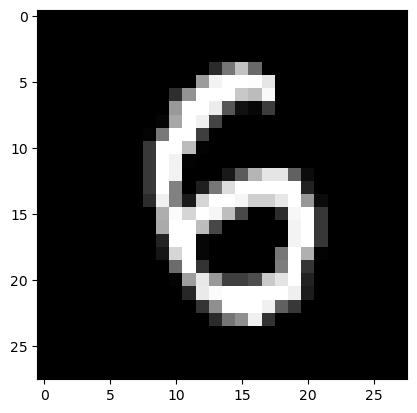

In [15]:
"""
Plot:
 - pick one element from labels_subsampled
     - Print the label value
     - Plot the pre-resized image
"""


### Uncomment each line of code to finish it. 
# we are going to see what an image looks like in the orignial form
i = 0                                                      # we choose the first element which is digit 5 for our example
print(f'Label for element {i} = {labels_subsampled[i]}')        # mention the labels_subsampled to fetch the labels
plt.imshow(features_subsampled[i].reshape(28, 28), cmap='gray')           # call the original features dataset to show the image


In [16]:
"""
Plot:
 - pick one element from labels_subsampled
     - Print the label value
     - Plot the post-resized image
"""



## Uncomment each line of code to finish it 
#i = 0                                                      # we choose the first element which is digit 5, for our example
# print(f'Label for element {i} = {_________[i]}')           # mention the labels_subsampled to fetch the labels
# plt.imshow(_____________[i].reshape(14, 14))               # call the resized dataset to show the image



'\nPlot:\n - pick one element from labels_subsampled\n     - Print the label value\n     - Plot the post-resized image\n'

In [17]:
###############################
##### TEST YOUR CODE HERE #####
###############################

# Check that the resized array is the correct size

features_resized_shape_expected = (10000, 196)

features_resized_shape_actual = features_resized.shape

assert features_resized_shape_actual == features_resized_shape_expected, \
    f"Incorrect.  Feature shape after resize should be {features_resized_shape_expected}, your method returned {features_resized_shape_actual}."

print("Feature shape after resize test passed.")


Feature shape after resize test passed.


### Run cell below to initialize data for resize test

In [18]:
feature_pre_resize =np.load('feature_pre_resize.npy')

feature_post_resize_expected = np.load('feature_post_resize_expected.npy')

In [19]:
###############################
##### TEST YOUR CODE HERE #####
###############################

# Test resize method on specific testcase

feature_post_resized_actual = resize(feature_pre_resize)

assert np.allclose(feature_post_resized_actual, feature_post_resize_expected, 1e-4), \
    "post resize image is not correct"
 
print("Feature resize test passed.")


Feature resize test passed.


## Food for thought
How do you think the resize function works to resize the image from 28X28 to 14X14. Is some information lost over there?

The `resize()` function works by downscaling an image from 28x28 pixels to 14x14 pixels using an interpolation technique. This reduces the resolution of the image, which leads to the following:

### How it works:
- **Resizing process**: The `cv2.resize()` method takes the original 28x28 pixel image and maps it to a smaller 14x14 grid. To do this, it interpolates pixel values. Interpolation means estimating new pixel values based on the surrounding pixels. Depending on the method used (e.g., bilinear or nearest-neighbor interpolation), the resized image can look slightly different.
- **Flattening**: After resizing, the 14x14 image is flattened into a 1D array of 196 elements to match the expected input shape for machine learning models.

### Is information lost?
Yes, information is lost during resizing because the process compresses the image, reducing its resolution by removing or averaging pixel data. Here’s how:
- **Less detail**: The 28x28 image has 784 pixels, while the resized 14x14 image has only 196. This reduction means some fine details, like subtle edges or small patterns, are lost.
- **Blurring effects**: Depending on the interpolation method, the resized image can look blurry because the pixel values in the smaller image are an average of several pixels from the larger one.
  
### Trade-offs:
1. **Advantages**:
   - **Reduced computational cost**: Smaller images mean fewer features to process, which reduces the amount of memory and computational power required for training models like SVMs.
   - **Faster training**: With fewer features, the SVM model can train faster and with less data complexity.

2. **Disadvantages**:
   - **Loss of detail**: Important visual information, like sharp edges or small-scale patterns, may be blurred or lost entirely, which could affect model accuracy.
   - **Potential drop in performance**: For highly detailed tasks, reducing the resolution can cause the model to miss important cues, leading to lower classification accuracy.

In summary, resizing is a trade-off between computational efficiency and the amount of visual detail retained. While it helps reduce the model's complexity and training time, some valuable information is inevitably lost in the process.

## Data Preprocessing

Construct the actual training dataset (80% of the data) and the testing dataset (20%) using `train_test_split()`.  This function returns training and testing sets that we will use to train the SVM. Note - we are going to use validation dataset and testing dataset interchangeably over here, however they are not the same. In any situation - around 80% of data is training data and 15% is testing data and 5% withheld data is the validation data - it is just use to check that the training is done well. 

### Do not change the method name, signature, or return values.

In [20]:
def data_preprocessing(x,y):
    '''
    x: Feature dataset after subsampling and resizing
    y: Feature dataset after subsampling
    
    return: x_train (feature training set),
            x_val (feature validation set),
            y_train (label training set),
            y_val (label validation set)
            
    Notes:Get train and validation split with random state 42, test size 0.2 (since we want 20% as validation set),
    shuffled, and stratified

    '''


### Uncomment each line of code over here to finish the code 
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y) #this basically splits the whole datset into training and testing dataset for the purpose of keeping one part of data unseen for testing 
                                                                                                                                                            # fill in teh blanks in the above line with the dataset you want to split, the proportion of the split (80-20), assign the random_state = 42 and the shuffle the data by assigning True and stratify the labels - y
    return x_train, x_val, y_train, y_val # return all the four datapoints 






In [21]:
###############################
##### TEST YOUR CODE HERE #####
###############################

# Test to verify that train_test_spllit was called correctly from data_preprocessing()

with patch("__main__.train_test_split") as train_test_split_mock:
    x, y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    train_test_split_mock.return_value = x, y, x, y
        
    try:
        data_preprocessing(x, y)
    except Exception as e:
        raise Exception("Failed to run data_preprocessing()") from e
        
    try:
        # specify all parameters in their code otherwise assertion fails
        train_test_split_mock.assert_called_once_with(ANY, ANY, test_size=0.2, random_state=42, shuffle=True, stratify=ANY)
    except AssertionError as e:
        raise AssertionError("data_preprocessing() doesn't call train_test_split() with all parameters " + \
                             "defined correctly. train_test_split() should be called with test_size=0.2, " + \
                             "random_state=42, shuffled, and stratified") from e
        
print('data_preprocessing() call train_test_split() passed.')


data_preprocessing() call train_test_split() passed.


## Call the data_preprocessing method

In [22]:
'''
Call data_preprocessing.
Make sure the arguments are the features (after resizing and subsampling) and the labels (after subsampling) and not the original data set.
Put the return data in the variables: x_train, x_val, y_train, y_val

'''

# Complete the line of code below:
x_train, x_val, y_train, y_val = data_preprocessing(features_resized, labels_subsampled) #Call the data preprocessing function with the resized features and subsampled labels


Print out the shape of each data set returned from data_preprocessing

In [23]:
# Print out array shapes to verify each is the expected size


print(f'Training features shape: {x_train.shape}')
print(f'Validation features shape: {x_val.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation labels shape: {y_val.shape}')


Training features shape: (8000, 196)
Validation features shape: (2000, 196)
Training labels shape: (8000,)
Validation labels shape: (2000,)


In [24]:
###############################
##### TEST YOUR CODE HERE #####
###############################

# Check that the training and validation arrays are the correct size

x_train_shape_expected = (8000, 196)
x_train_shape_actual = x_train.shape

assert x_train_shape_expected == x_train_shape_actual, \
    f"Incorrect.  x_train shape should be {x_train_shape_expected}, your method returned {x_train_shape_actual}."


x_val_shape_expected = (2000, 196)
x_val_shape_actual  = x_val.shape

assert x_val_shape_expected == x_val_shape_actual, \
    f"Incorrect.  x_val shape should be {x_val_shape_expected}, your method returned {x_val_shape_actual}."


y_train_shape_expected = (8000,)
y_train_shape_actual  = y_train.shape

assert y_train_shape_expected == y_train_shape_actual, \
    f"Incorrect.  y_train shape should be {y_train_shape_expected}, your method returned {y_train_shape_actual}."


y_val_shape_expected = (2000,)
y_val_shape_actual  = y_val.shape

assert y_val_shape_expected == y_val_shape_actual, \
    f"Incorrect.  y_val shape should be {y_val_shape_expected}, your method returned {y_val_shape_actual}."


print("x_train, y_train, x_val, y_val shape test passed.")


x_train, y_train, x_val, y_val shape test passed.


## Support Vector Machines (SVM)
Support Vector Machines or SVM is a Machine Learning algorithm which creates a decision boundary to seperate different class of data. The basic idea behind their working is that they use the kernel trick (which is discussed in the class), to go from a lower dimension space where the data is not "linearly seperable" to a higher dimension space where they can be seperated linearly using hyperplanes (a fancy name for planes in higher dimensional space). This transformation does not involve coordinate calculation but rather inner products calculation (also discussed in the class) which is computationally more efficient. 

Here is a sample example (Courtesy of JeremyJordan.com) that shows how data which is not linearly seperable in a lower dimension space (as discussed above earlier) becomes linearly seperable in higher dimensioal space 
![SVM](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*zWzeMGyCc7KvGD9X8lwlnQ.png)

## Train an SVM

We are finally ready to train an SVM. Implement the method `train_SVM()` to train an SVM classifier on `x_train`, `y_train`. Then, later on we will test the trained SVM on `x_val`, `y_val`. 

Create the SVM classifier in scikit-learn using:

`classifier = svm.SVC(C=1.0, kernel=’rbf’, gamma=’auto’, cache_size=2000)`

Where:
* `C`: Regularization Parameter - this is used to control an issue called overfitting - a very common problem in learning models
* `kernel`: Kernel type - It is the method we use to seperate the data 
* `gamma`: Kernel coefficient - This defines how much a single data point is influential in creating the seperation boundary
* `cache_size`: Kernel cache - It is used to define the size of kernel cache which decides the speed of computation of Kernel matrix
See the link before for more details:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Your method should pass the regularization parameter, kernel, and gamma in as parameters.

### Do not change the method name, signature, or return values.

In [25]:
def train_SVM(x_train, y_train, C, kernel, gamma):
    '''    
    Train SVM model using the fit method, given training data x_train and y_train
    
    Input: 
    x_train: Feature training data
    y_train: Label training data
    
    C: regularization parameter
    kernel: kernel type
    gamma: kernel coefficient
    
    Return: The trained Classifier
    '''
    
### Uncomment each line of code below to finsh the code

    clf = svm.SVC(C=C, kernel=kernel, gamma=gamma, cache_size=2000, verbose=True)  #initalize the SVM model over here with the 
                                                                                                 # parameters of the SVM model - namely C, kernel and gamma and assign a suitable cache size for calculation and verbose value
    clf.fit(x_train, y_train) # fit trains the SVM classifier so assign it the trainig data 
    return clf # return the classifier


    

In [26]:
###############################
##### TEST YOUR CODE HERE #####
###############################

with patch("sklearn.svm.SVC") as svm_mock: 
    x_train_mock, y_train_mock = np.array([1]), np.array([1])
    svm_mock.return_value = Mock()

    try:
        train_SVM(x_train_mock, y_train_mock, 1, 'rbf', 'auto')
    except Exception as e:
        raise Exception("Failed to run train_test_SVM()") from e

    try:
        svm_mock.assert_called_once()
    except AssertionError as e:
        raise Exception("SVC wasn't initialized in train_test_SVM(). Should initialize by calling svm.SVC() method.") from e

    try:
        svm_mock.return_value.fit.assert_called_once()
    except AssertionError as e:
        raise Exception("Didn't train the SVM in train_test_SVM(). fit() function should be called.") from e

print('train_SVM function passed.')

train_SVM function passed.


## Run SVM Trainer

Call your `train_SVM()` method with the training data.
Use the following parameters:
`C = 1`
`kernel = 'rbf'`
`gamma = 'auto'`

In [27]:
# Call train_SVM() using x_train and y_train
# For this run, use: C = 1, kernel = 'rbf', gamma = 'auto'


### Uncomment the code to finish it 
clf = train_SVM(x_train, y_train, C=1, kernel='rbf', gamma='auto') #Call the train SVM function with all the parameters to initalize and train your SVM classifier


[LibSVM]*
optimization finished, #iter = 800
obj = -800.000000, rho = -0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj = -800.000000, rho = 0.000000
nSV = 1600, nBSV = 1600
*
optimization finished, #iter = 800
obj 

## Support Samples

Get the total number of support samples for a given SVM classifier. Support vectors are the data points that are close to the decision boundary (the seperating hyper plane) and using that we are able to define the margin of our seperation. For example: if we have to do binary seperation - then the number of support samples would come out like [6, 8] - indicating that for the first class 6 support samples were used and for the second class 8 of them were used. When we ask you to calculate the sum of suppport samples later on - we want a sum of all the support samples over there that is 6+ 8. Similarly if we go have to do multinomial classificaiton (dividing into more than two groups) as we are doing here then we will get the numbers of support samples like [4, 7, 3, 9, 11, ...] and we would need the sum of all support samples when we ask the sum of support samples later on. 

Check the SVM documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Do not change the method name, signature, or return values.

In [28]:
def get_number_of_support_samples(clf):
    '''
    clf: Model
    return: Total number of support samples
    '''

    # Get the number of support vectors for each class
    support_samples_per_class = clf.n_support_
    
    # Sum up the support samples for all classes
    total_support_samples = sum(support_samples_per_class)
    
    return total_support_samples


## Evaluate the Model


To get an insight into the trained model, we will look at:
* validation accuracy using `clf.score()` - Validation accuracy is calculated by making our trained model do prediction on the withheled away test data (the 20% data)
* confusion matrix using `confusion_matrix()` - Confusion matrix is a method to point out what kind of mistakes are being made by our model - like is it mis-identifying class A to be class B or vice versa 
* support vector percentage which is the ratio of the numper of support samples (call `get_number_of_support_samples()` to the total number of training samples. It is a way of knowing that how much of the total dataset was involved in the decision of the sperating hyperplane

More on confusion matrix can be read at https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

Calculate and print these three values within your train_test_SVM method.

In [29]:

'''
Print the classifier score and validation error, confusion matrix, and support sample ratio
Call get_number_of_support_samples() to calculate the total number of support samples 
To calculate the support vector percentage - divide the total number of support samples by the total feature vector size
'''

## Uncomment each line of code to finish the code 
y_pred_val = clf.predict(x_val)                                     # use the predict function on the testing data to get performance of trained model on testing data
print("Classifier Score: ", clf.score(x_val, y_val))                # score gives the accuray performance of the model - use it to get the performance of the model it works on testing data
print("Confusion Matrix: ")
print(confusion_matrix(y_val, y_pred_val))# call the confusion matrix on the predicted data and the actual data

num_support_samples = get_number_of_support_samples(clf)
print("Number Support Vectors: ", num_support_samples)   # Print number of support vectors of the classifier clf

# Get the total number of training samples (feature vector size)
feature_vector_size = len(x_train)
print("Feature Vector Size: ", len(x_train))                            # feature vectors used by our model 

print("Support Vectors Percentage: ", num_support_samples / feature_vector_size)     #get support vector percentage to check overfitting



Classifier Score:  0.245
Confusion Matrix: 
[[ 29   0   0   0   0   0   0   0   0 171]
 [  0   1   0   0   0   0   0   0   0 199]
 [  0   0   5   0   0   0   0   0   0 195]
 [  0   0   0   8   0   0   0   0   0 192]
 [  0   0   0   0  46   0   0   0   0 154]
 [  0   0   0   0   0  33   0   0   0 167]
 [  0   0   0   0   0   0  57   0   0 143]
 [  0   0   0   0   0   0   0 100   0 100]
 [  0   0   0   0   0   0   0   0  12 188]
 [  0   0   0   0   1   0   0   0   0 199]]
Number Support Vectors:  8000
Feature Vector Size:  8000
Support Vectors Percentage:  1.0


## Review results

Let us ask a few questions to understand the above results 

1. What does the low classifier score signify? 

2. Why is the last row of the confusion matrix populated? What does it have to do with the low classifier score? 

3. We get a support vectors percentage of 1.0. What does this high value signify?  Can we use it to explain the low classifier score?


### 1. What does the low classifier score signify?

The **classifier score (validation accuracy)** of **0.2495** indicates that the SVM model correctly predicted the labels for only about 24.95% of the validation data. This is a very low accuracy for a classification task, suggesting that the model is **performing poorly**. Several potential reasons for this could be:
- **Overfitting or Underfitting**: The model might have either memorized the training data (overfitting) or failed to capture the underlying patterns (underfitting).
- **Class Imbalance**: If certain classes dominate the dataset, the model may be biased towards predicting those dominant classes, resulting in poor accuracy for the minority classes.
- **Inappropriate Hyperparameters**: The choice of `C=1`, `kernel='rbf'`, and `gamma='auto'` may not be suitable for this dataset.

### 2. Why is the last row of the confusion matrix populated? What does it have to do with the low classifier score?

The **last row of the confusion matrix** shows that the model is **overwhelmingly predicting one class (class 9)**. For most of the rows (actual classes 0-8), we see a high number of predictions in column 9, suggesting that the model is often misclassifying samples from many classes as class 9. This behavior is a sign of **class bias** in the model, where it favors predicting one class over others.

- **Class 9 dominance**: Out of 200 samples from class 9, the model predicted 199 correctly, but it also misclassified many other samples from different classes (like class 0, 1, 2, etc.) as class 9.
  
- **Impact on accuracy**: Since the model heavily favors class 9, it performs well only when the true label is class 9 but poorly on all other classes. This skews the overall accuracy down to 24.95%, as the model fails to generalize across all classes.

### 3. We get a support vectors percentage of 1.0. What does this high value signify? Can we use it to explain the low classifier score?

A **support vectors percentage of 1.0** means that **every single training sample** is used as a support vector. This is highly unusual and indicates that the model is **struggling to find a clear decision boundary** between the classes. Typically, only a small fraction of the data should be support vectors if the model is confidently separating the classes.

- **Explanation**: When the model uses **all samples as support vectors**, it suggests that the classes are either **very hard to separate** or that the model's parameters (e.g., `C`, `gamma`, `kernel`) are not appropriate for the data. This results in a high complexity model that attempts to classify every point as a support vector, leading to overfitting or model confusion.
  
- **Overfitting**: The fact that every training sample is a support vector implies that the model is trying too hard to fit the training data. However, because of this, it fails to generalize well on the validation data, contributing to the low classifier score.

### Summary:
1. The low classifier score (24.95%) signifies poor model performance, likely due to poor generalization.
2. The confusion matrix shows that the model is heavily biased toward predicting class 9, which contributes to the low accuracy.
3. The 100% support vector percentage suggests that the model is overfitting, failing to separate the classes effectively, which further explains the poor accuracy.

To improve the model's performance, you might consider:
- **Tuning hyperparameters** (adjust `C`, `gamma`, or try a different kernel).
- **Checking for class imbalance** and applying techniques like oversampling, undersampling, or class weighting.
- **Feature scaling** if it's not already done.

## Improve Your Model by Optimizing Hyperparameters using grid_search_SVM()

Next, we will explore different hyperparameters to improve your SVM model. 

Implement the method grid_search_SVM(). In this function, use the sklearn.model_selection.GridSearchCV function to pick a better value than the default one for the hyperparameters C, gamma, and kernel. 

The method takes the training and validation feature and label data as input, along with a params dictionary.  The dictionary is of the form:

params = {'C': [ ], 'gamma': [ ],'kernel': [ ]}

For this assignment, use different combinations of the above hyperparameters to see what give the best result. 

Hyperparameter values to test are added to the appropriate list. 

more on 'GridSearchCV' at https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

### Do not change the method name, signature, or return values.

In [30]:
def grid_search_SVM(x_train, y_train, params):
    '''
    x_train: feature training data
    y_train: label trainind data
    params: Dictionary of hyperparameters to test, where the parameter is the key and the value is a list of values to test.
    
    return: classifier
    '''
    
##uncomment each line of code to finish it 
    classifier = GridSearchCV(svm.SVC(cache_size=2000), params, cv=5, scoring='accuracy', verbose=10, n_jobs=-1) #Assign the cache size as done earlier, assign how many fold cross validation you want in cv and choose which metric to use for scoring and choose a suitable number of jobs for quick execution
    classifier.fit(x_train, y_train)                                                                                      #run the fit function on training data
          
    return classifier


## Run grid_search_SVM()

Run your grid_search_SVM() method with a set of hyperparameters to optimize.

Use combinations of the following parameter options:
* `'C': [0.1, 10, 100, 1000, 10000]`
* `'gamma': [1e-9, 1e-7, 1e-6, 1e-5, 1e-4, 5 * 1e-3, 1]`
* `'kernel': ['rbf', 'poly']`

Save the returned classifier to the variable 'svm'.

### Important Note

Running grid search can be computationally intensive.  If you run the full set of parameters above, it will take approximately one hour to run.  

For this assignment, it is recommended that you run each grid search with only 2 or 3 values per hyperparameter at one time.  Use those results to determine the next set of hyper parameters to use.

In order to pass the test, your best score must be above 0.95. 

### Autograder Note

When you finally submit your assignment, the entire notebook must run in under 5 minutes.  Therefore, your parameter dictionary should have no more than 2 values per hyperparamter.  If your notebook passes when you run it but fails the autograder, make sure that your notebook runs in under 5 minutes. 



In [31]:
'''
Call grid_search_SVM.

Define your parameter list.  Use a subset of the values below:

#params = {'C': [0.1, 10, 100, 1000, 10000], 'gamma': [1e-9, 1e-7, 1e-6, 1e-5, 1e-4, 5 * 1e-3, 1], 'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}

Put the results in the variable gs_svm

'''

## uncomment each line for runnign the code  
params = {'C': [10, 100], 'gamma': [1e-5, 5 * 1e-3], 'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}  #Choose only two values for C and gamma and just one value for kernel 

gs_svm = grid_search_SVM(x_train, y_train, params) # Call the grid search function with all the datapoints and parameters



Fitting 5 folds for each of 16 candidates, totalling 80 fits


## Analyze the results

Print out the following:
* Best score for training data
* Best C
* Best Kernel
* Best Gamma
* Accuracy of hyperparameters tried

Also find and print:
* Best score for validation data
* Confusion Matrix

In [32]:
print('Best score for training data:', gs_svm.best_score_, "\n")
print('Best C:', gs_svm.best_estimator_.C, "\n")
print('Best Kernel:', gs_svm.best_estimator_.kernel, "\n")
print('Best Gamma:', gs_svm.best_estimator_.gamma, "\n")
print('Accuracy of hyperparameters tried:', gs_svm.cv_results_, '\n')

svm_best = gs_svm.best_estimator_
print('Best score for validation data:', svm_best.score(x_val, y_val))
y_pred_val = svm_best.predict(x_val)
print("Confusion Matrix: ")
print(confusion_matrix(y_pred_val, y_val))


Best score for training data: 0.9491250000000001 

Best C: 10 

Best Kernel: poly 

Best Gamma: 1e-05 

Accuracy of hyperparameters tried: {'mean_fit_time': array([9.7983449 , 0.91817565, 2.4936552 , 6.38147378, 9.45859632,
       0.89610987, 2.47461033, 8.42156334, 9.75643592, 0.88312774,
       2.40457611, 4.68817263, 9.49111104, 0.89982243, 2.4213903 ,
       8.56770854]), 'std_fit_time': array([0.18626567, 0.01103723, 0.78583876, 0.24756818, 0.18849536,
       0.02304811, 0.84540672, 0.17959012, 0.1306867 , 0.02116524,
       0.79540386, 0.13495425, 0.31488974, 0.0311106 , 0.77748079,
       0.19796024]), 'mean_score_time': array([2.36588778, 0.23706493, 0.22882876, 1.54936762, 2.75156178,
       0.23286695, 0.23377924, 1.15677786, 2.19521399, 0.2332324 ,
       0.22946787, 1.42379713, 2.56410165, 0.22468882, 0.23443718,
       1.04879174]), 'std_score_time': array([0.03706684, 0.00525695, 0.00506214, 0.01817459, 0.02939844,
       0.00778606, 0.00444801, 0.04824474, 0.04270527, 0.

Finally, run train_svm with the best C, kernel, and gamma values that you found and print the results.  
Find values that will give a model accuracy > 0.95


In [33]:
# Fill in the C, kernel, and gamma values that provide the best accuracy.  
# The accuracy must be greater than 0.95 to pass the autograder

# Uncomment each line of code for compeltion
C = 10
kernel = 'poly'
gamma = 1e-05                        # Fill in a suitable value for C, kernel and gamma 

clf_best = train_SVM(x_train, y_train, C=C, kernel=kernel, gamma=gamma) #Call the SVM function with all the right values


y_pred_val = clf_best.predict(x_val)                         # use the predict function on the testing data to get performance of trained model on testing data
print("Classifier Score: ", clf_best.score(x_val, y_val))    # score gives the accuray performance of the model - use it to get the performance of the model 
print("Confusion Matrix: ")
print(confusion_matrix(y_val, y_pred_val))                   # call the confusion matrix on the predicted data and the actual data
print("Number Support Vectors: ", get_number_of_support_samples(clf_best))      # Print number of support vectors 
feature_vector_size = len(x_train)
print("Feature Vector Size: ", feature_vector_size)         # feature vectors used by our model 
support_vector_percentage = get_number_of_support_samples(clf_best) / feature_vector_size
print("Support Vectors Percentage: ", support_vector_percentage)  #get support vector percentage to check overfitting




[LibSVM]*
optimization finished, #iter = 120
obj = -0.085089, rho = 0.800265
nSV = 40, nBSV = 0
*
optimization finished, #iter = 376
obj = -0.108915, rho = 0.274974
nSV = 109, nBSV = 0
*
optimization finished, #iter = 321
obj = -0.092184, rho = 0.280614
nSV = 103, nBSV = 0
*
optimization finished, #iter = 253
obj = -0.096342, rho = 0.480697
nSV = 83, nBSV = 0
*
optimization finished, #iter = 444
obj = -0.138212, rho = 0.676737
nSV = 134, nBSV = 0
*
optimization finished, #iter = 391
obj = -0.117169, rho = 0.326176
nSV = 102, nBSV = 0
*
optimization finished, #iter = 250
obj = -0.100279, rho = 0.579471
nSV = 78, nBSV = 0
*
optimization finished, #iter = 316
obj = -0.108157, rho = 0.369273
nSV = 98, nBSV = 0
*
optimization finished, #iter = 297
obj = -0.122372, rho = 0.291047
nSV = 89, nBSV = 0
*
optimization finished, #iter = 450
obj = -0.339742, rho = -0.730916
nSV = 98, nBSV = 0
*
optimization finished, #iter = 405
obj = -0.258748, rho = -0.682026
nSV = 94, nBSV = 0
*
optimization fin

## Compare your results 


Let us compare our best model found after the grid search and the initial model. 
1. They have a difference in accuracy - how can you explain the difference in accuracy with the confusion matrix of the two models

2. The issue faced by the initial model is called - Overfitting - how does grid search help in addressing overfitting ? 

3. Can you frame a relation between support vector percentage and performance of a model, do you think it will always hold? can you think of some situation where it may not hold?


In [34]:
###############################
##### TEST YOUR CODE HERE #####
###############################

# Test the accuracy of the final model

validation_data = pd.read_csv('svm_validation_data.csv', header=None)
# print(validation_data)
x_val_test = validation_data.iloc[:,:-1].to_numpy()
y_val_test = validation_data.iloc[:,-1].to_numpy()

accuracy = clf_best.score(x_val_test, y_val_test)
print(f'Accuracy: {accuracy}')
assert accuracy > 0.95
print('Your final model passed the accuracy test.')

Accuracy: 0.9567857142857142
Your final model passed the accuracy test.


## Demonstration 
You can use the code below to see that how your trained classifier performs when a random testing sample is used. 

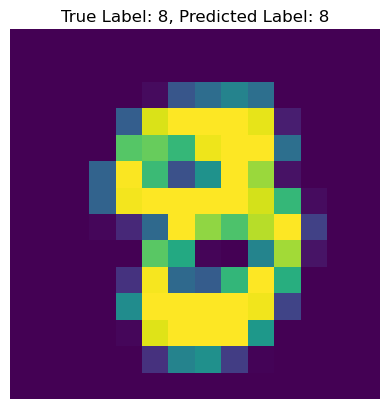

In [35]:
random_index = np.random.randint(0, x_val_test.shape[0])


sample_image = x_val_test[random_index]
true_label = y_val_test[random_index]

predicted_label = clf_best.predict([sample_image])[0]

plt.imshow(sample_image.reshape(14, 14))
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off') 
plt.show()